In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 
import plotly as plt

# E-news Express Project 

In [244]:
data = pd.read_csv('abtest.csv')

In [246]:
data.head()


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


Columns user_id, group (categorical variable: control and treatment), landing_page (cat.var. yes or no), time_sent_on_the_page (numerical), converted (cat. var. yes or no), language_preferred (cat. var.: English Spanish French)

In [247]:
len(data)

100

In [248]:
data.shape

(100, 6)

data has form : 6 columns 100 rows

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Categorical variables are shown as "object" type and the only numerical varable of interest is "time_spent_on_the_page"  (type float).

In [250]:
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


Average time spenton the page is 5.38 min. Standard deviation is 2.38 min. Minimum time is 0.19 min. max. 10.71 min.  

# Checking the data for counts and  missing values. 

In [251]:
data.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Data is 'clean'.

In [252]:
data.group.value_counts(normalize=True, dropna=False)

treatment    0.5
control      0.5
Name: group, dtype: float64

Checked that 'control' (old page) and 'treatment' (visitng new page) groups have the same size (50/50 split).

In [253]:
data.landing_page.value_counts(normalize=True, dropna=False)

new    0.5
old    0.5
Name: landing_page, dtype: float64

(Confirming that landing_page has the same sizes as control and treatment groups.) 

In [254]:
data.converted.value_counts(normalize=True, dropna=False)

yes    0.54
no     0.46
Name: converted, dtype: float64

54% of all people visiting the page converted to subscription.

In [255]:
data.language_preferred.value_counts(normalize=True, dropna=False)

French     0.34
Spanish    0.34
English    0.32
Name: language_preferred, dtype: float64

Correspondingly 34%, 34%and 32% preferred French, Spanish and English language.

In [256]:
data.language_preferred.value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

In [315]:
data.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

Conclusions: 
* we have 'clean' data set for 100 customers. 
* Data has 50-50 split for categorical variable "group", "landing_page".
* For variable "converted" the split is 54 (yes) and 46 (no). 
* there are 3 possible preferred languages: English French and Spanish.
* Numerical variable "time spenton the page" has values from 0.19min. to 10.71min. with average 5.38 min. 

# Univariate analysis

Boxplot and histogram for time spent on the page.

<AxesSubplot:xlabel='time_spent_on_the_page'>

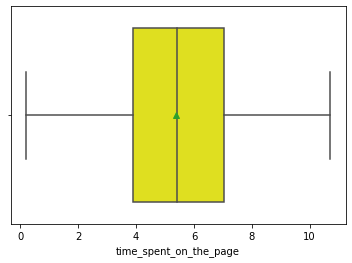

In [258]:
sns.boxplot(data=data, x='time_spent_on_the_page',  showmeans=True, color="yellow")

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Count'>

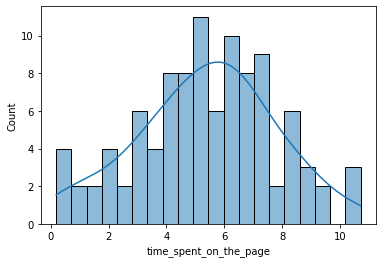

In [259]:
sns.histplot(
        data=data, x='time_spent_on_the_page', bins=20,palette="winter",kde=True
    )  
#ax_hist2.axvline(
#        data['time_spent_on_the_page'].mean(), color="green", linestyle="--"
#    )  
#ax_hist2.axvline(
#        data['time_spent_on_the_page'].median(), color="black", linestyle="-"

# Different variables and different categorical data

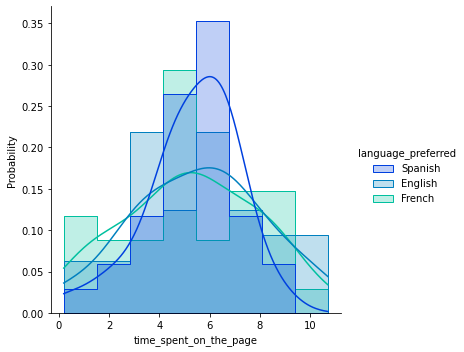

In [318]:
sns.displot(data,x='time_spent_on_the_page',hue='language_preferred',stat="probability",element="step",kde=True,common_norm=False,palette='winter')

Distributions for times spent on the page when considering preferred language - do not look very diferent. This suggest the time spent on the page does not depend on the preferred language.

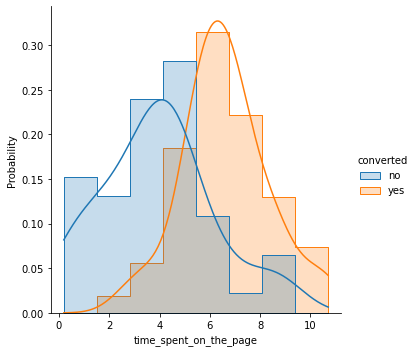

In [261]:
sns.displot(data,x='time_spent_on_the_page',hue='converted',stat="probability",kde=True,common_norm=False,element="step")

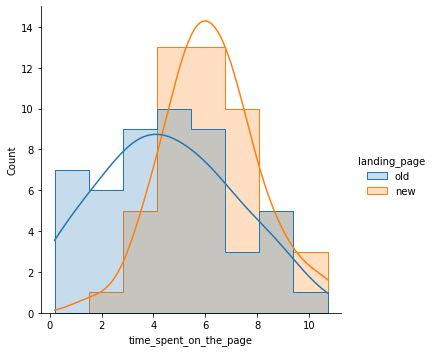

In [316]:
sns.displot(data,x='time_spent_on_the_page',hue='landing_page',kde=True,common_norm=False,element="step")

Distributions for time spent on the page for new and old pages look different. This suggest a trend: customers visitng newpage spent more time 
    on the page

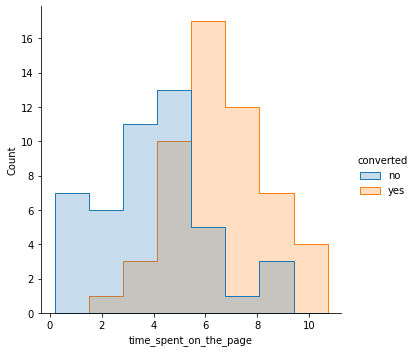

In [264]:
sns.displot(data,x='time_spent_on_the_page',hue='converted',common_norm=False,element="step")

Distribution for time spent on the page for the 2 groups of converted and  not converted to subscription look different. 

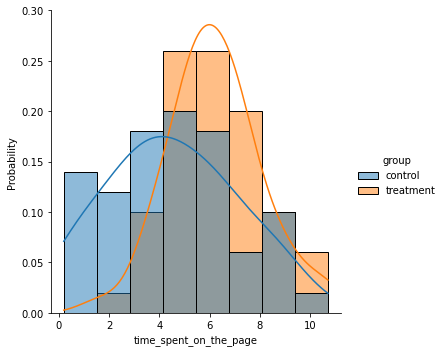

In [265]:
sns.displot(data,x='time_spent_on_the_page',hue='group',stat="probability",kde=True,common_norm=False)

#  Splitting data  into subsets 

I will later use this the dataframes created in this section to analyze in detailthe visuaization and the statistics related questions.

In [266]:
groupcontrol=data[data['group']=='control']

In [267]:
groupcontrol.describe()

,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546566.50000,4.532400
std,17.67767,2.581975
min,546493.00000,0.190000
25%,546555.25000,2.720000
50%,546567.50000,4.380000
75%,546579.75000,6.442500
max,546592.00000,10.300000


In [268]:
grouptreatment=data[data['group']=='treatment']

In [269]:
grouptreatment.describe()

,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546467.50000,6.223200
std,14.57738,1.817031
min,546443.00000,1.650000
25%,546455.25000,5.175000
50%,546467.50000,6.105000
75%,546479.75000,7.160000
max,546492.00000,10.710000


In [270]:
grE=data[data['language_preferred']=='English']

In [271]:
grE.describe()

,user_id,time_spent_on_the_page
count,32.000000,32.000000
mean,546504.625000,5.559063
std,45.658444,2.621079
min,546443.000000,0.220000
25%,546462.250000,3.617500
50%,546490.500000,5.755000
75%,546550.250000,7.137500
max,546558.000000,10.500000


In [272]:
grS=data[data['language_preferred']=='Spanish']

In [273]:
grS.describe()

,user_id,time_spent_on_the_page
count,34.000000,34.000000
mean,546528.823529,5.331765
std,56.996794,1.818095
min,546446.000000,0.190000
25%,546479.500000,4.475000
50%,546534.000000,5.605000
75%,546583.750000,6.515000
max,546592.000000,8.720000


In [274]:
grF=data[data['language_preferred']=='French']

In [275]:
grF.describe()

,user_id,time_spent_on_the_page
count,34.000000,34.000000
mean,546516.823529,5.253235
std,52.009597,2.675413
min,546445.000000,0.400000
25%,546470.250000,3.395000
50%,546524.500000,5.315000
75%,546566.750000,7.367500
max,546575.000000,10.710000


In [276]:
groupconverted=data[data['converted']=='yes']

In [277]:
groupconverted.describe()

,user_id,time_spent_on_the_page
count,54.000000,54.000000
mean,546503.555556,6.623148
std,48.645296,1.708427
min,546444.000000,2.580000
25%,546464.500000,5.500000
50%,546481.500000,6.495000
75%,546552.750000,7.367500
max,546588.000000,10.710000


In [278]:
groupnonconverted=data[data['converted']=='no']

In [279]:
groupnonconverted.describe()

,user_id,time_spent_on_the_page
count,46.000000,46.000000
mean,546532.782609,3.915870
std,52.517474,2.226897
min,546443.000000,0.190000
25%,546481.000000,2.337500
50%,546561.500000,3.980000
75%,546573.750000,4.922500
max,546592.000000,9.150000


In [280]:
grLPNEW=data[data['landing_page']=='new']

In [281]:
grLPNEW.describe()

,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546467.50000,6.223200
std,14.57738,1.817031
min,546443.00000,1.650000
25%,546455.25000,5.175000
50%,546467.50000,6.105000
75%,546479.75000,7.160000
max,546492.00000,10.710000


In [282]:
grLPOLD=data[data['landing_page']=='old']

In [283]:
grLPOLD.describe()

,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546566.50000,4.532400
std,17.67767,2.581975
min,546493.00000,0.190000
25%,546555.25000,2.720000
50%,546567.50000,4.380000
75%,546579.75000,6.442500
max,546592.00000,10.300000


In [284]:
grLPOLD.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English


#  Bi- and multivariate analysis


I analyze firts the numerical variable- the time spent on the page using different "hue" value to visualize the full data. 
Later I analyse other variables (categorical) - with binomial character: landing page (new or old), converted (yes or no), and multinomial: language preferred (English,French,Spanish). 
I plot boxplots, histograms and KDE. 


### Visualization with respect to preferred language:

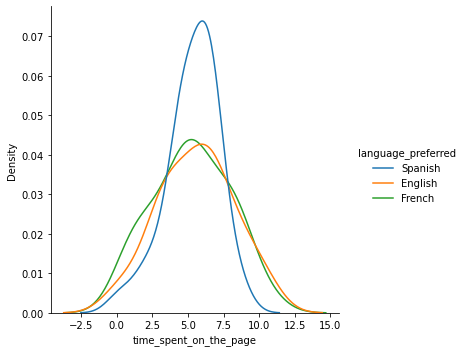

In [287]:
sns.displot(data=data,x='time_spent_on_the_page',kind='kde',hue='language_preferred')

Conclusion: In full data one cannot see differences for average times spent on page  for different preferred language groups (English 32%,French 34%,Spanish 34%)

Visualization for categorical variables:

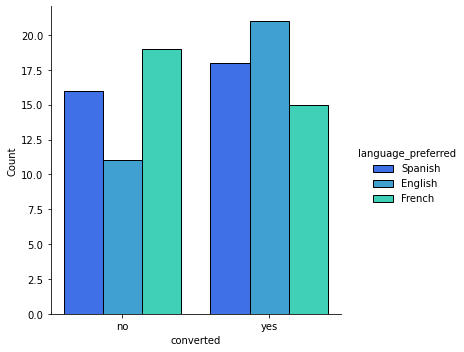

In [288]:
sns.displot(data=data, x="converted", hue="language_preferred", multiple="dodge", shrink=.8,palette="winter")

There is a question number 3 relatedto this figure:Does the converted status dependsn preferred language.
One can see differences in counts for each of the language, but without calculations  one cannot make definitive conclusion.   

<AxesSubplot:xlabel='landing_page', ylabel='Count'>

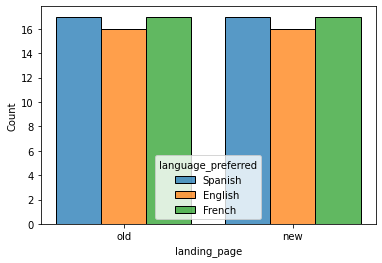

In [289]:
sns.histplot(data=data, x="landing_page", hue="language_preferred", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Count'>

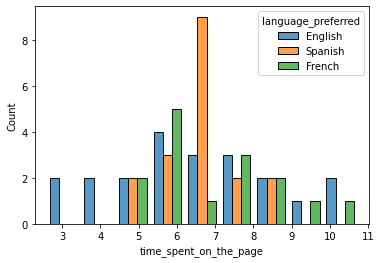

In [290]:
sns.histplot(data=groupconverted, x="time_spent_on_the_page", hue="language_preferred", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Count'>

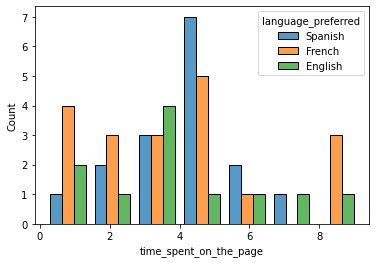

In [291]:
sns.histplot(data=groupnonconverted, x="time_spent_on_the_page", hue="language_preferred", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Count'>

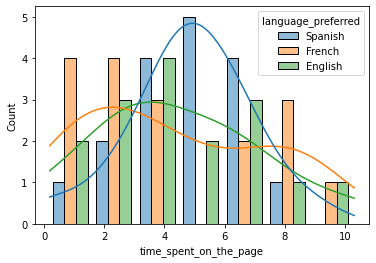

In [292]:
sns.histplot(data=groupcontrol, x="time_spent_on_the_page", hue="language_preferred", multiple="dodge", kde=True,shrink=.8)

Conclusion: In the "control" group (visiting old landing page) we see that distributions for different languages have diferent shapes. Without additional tests it is difficult to say someting based  only on visualization. 

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Count'>

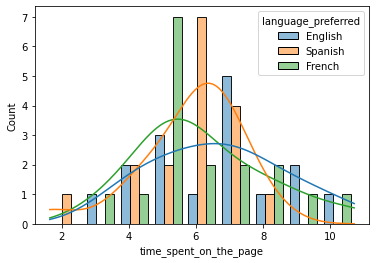

In [293]:
sns.histplot(data=grouptreatment, x="time_spent_on_the_page", hue="language_preferred", kde=True,multiple="dodge", shrink=.8)

Figure: Average time spent on the new page for the 3 customer grups with different preferred language. Conclusion the differences are not significant enough to  say anything about average trends.  

For the "treatment" group (visiting new landing page)the distributions resemble normal distribution with mean between 4.5 nd 5.5 min. with different standard deviations.

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Count'>

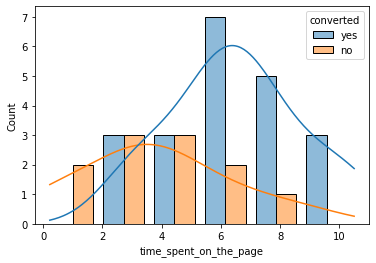

In [294]:
sns.histplot(data=grE, x="time_spent_on_the_page", hue="converted",kde=True, multiple="dodge", shrink=.8)

Figure above - only for English preferred language sub-sample.
Conclusion: In the English language group the visitors who converted to subsrcibing spent on average longer time on the page.

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Count'>

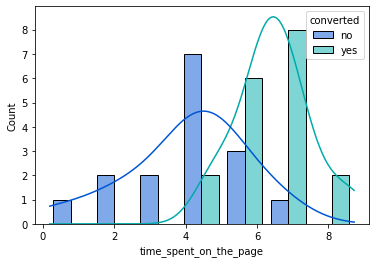

In [295]:
sns.histplot(data=grS, x="time_spent_on_the_page", hue="converted", multiple="dodge", kde=True,shrink=.8,palette='winter')

Conclusion: Spanish language group clearly those who converted to subsription on average spent longer time on the new page.

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Count'>

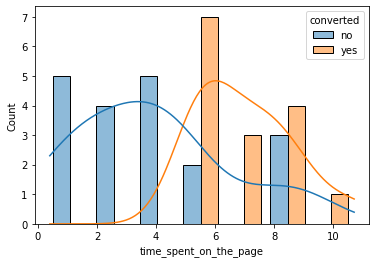

In [296]:
sns.histplot(data=grF, x="time_spent_on_the_page", hue="converted", multiple="dodge", kde=True, shrink=.8)

Conclusion: In the French laguage group, it is the same - those who converted to subsription on average spent longer time on the page.

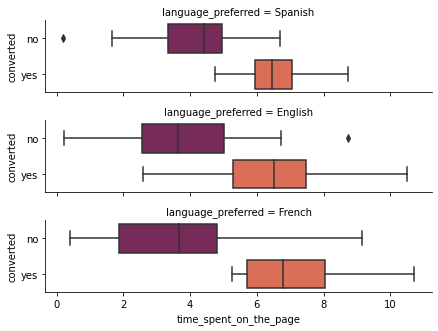

In [297]:
g = sns.catplot(x="time_spent_on_the_page", y="converted", row="language_preferred",
                kind="box", orient="h", height=1.5, aspect=4,
                data=data,palette='rocket')

Conclusion: In boxplot here we can see that average times spent on the web page  for those who converted to subscrption for all 3 languages is similar.

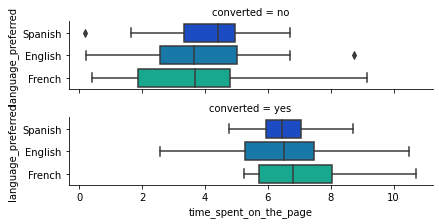

In [298]:
g = sns.catplot(x="time_spent_on_the_page", y="language_preferred", row="converted",
                kind="box", orient="h", height=1.5, aspect=4,
                data=data, palette='winter')

It is the same figure - but one can more easily compare the averages, interquarile ranges in this view.

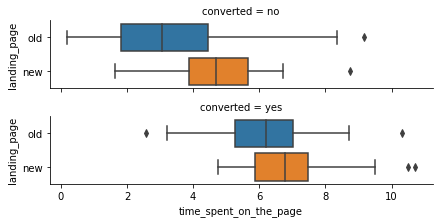

In [299]:
g = sns.catplot(x="time_spent_on_the_page", y="landing_page", row="converted",
                kind="box", orient="h", height=1.5, aspect=4,
                data=data)

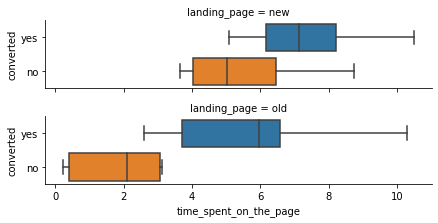

In [300]:
g = sns.catplot(x="time_spent_on_the_page", y="converted", row="landing_page",
                kind="box", orient="h", height=1.5, aspect=4,
                data=grE)

Figure for preferred language = English customers. Customers who visited new page and converted to subscription spent on average 1 min.longer than those who  visited the old page and 2min.longer than those who did not convert to subscription. 

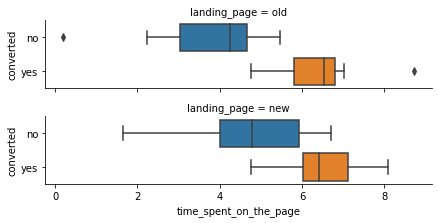

In [301]:
g = sns.catplot(x="time_spent_on_the_page", y="converted", row="landing_page",
                kind="box", orient="h", height=1.5, aspect=4,
                data=grS)

Preferred language - Spanish. For customers who converted status to subscription similar average times spent on both new and old version of the landing page.

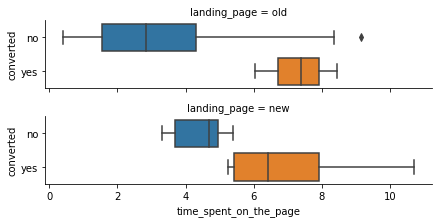

In [302]:
g = sns.catplot(x="time_spent_on_the_page", y="converted", row="landing_page",
                kind="box", orient="h", height=1.5, aspect=4,
                data=grF)

Preferred language - French: Qualitatively we see similar trend as for Spanish speaking sample.

# Contingency tables

In [303]:
pd.crosstab(data['landing_page'],data['language_preferred'])

language_preferred,English,French,Spanish
landing_page,,,
new,16,17,17
old,16,17,17


In [304]:
pd.crosstab(data['converted'],data['landing_page'])  #I repeat this later insection with inferential stat questions.

landing_page,new,old
converted,,
no,17,29
yes,33,21


In [319]:
pd.crosstab(data['converted'],data['language_preferred'])


language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Barplots

To make sure I did not miss a trend I plot barplot type figures.  

<AxesSubplot:xlabel='converted', ylabel='count'>

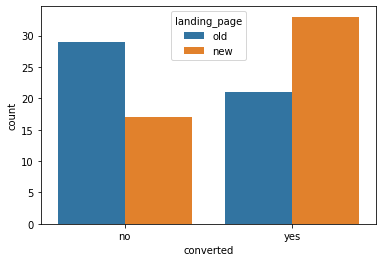

In [306]:
sns.countplot(x='converted',data=data,hue='landing_page')

<AxesSubplot:xlabel='converted', ylabel='count'>

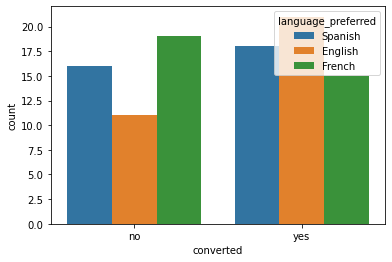

In [307]:
sns.countplot(x='converted',data=data,hue='language_preferred')

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

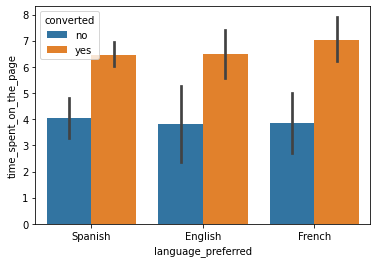

In [308]:
sns.barplot(x='language_preferred', y='time_spent_on_the_page', data=data,hue='converted')  # barplot

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

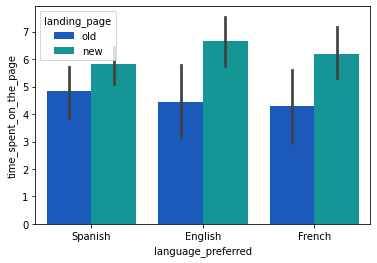

In [309]:
sns.barplot(x='language_preferred', y='time_spent_on_the_page', data=data,hue='landing_page',palette='winter')  # barplot

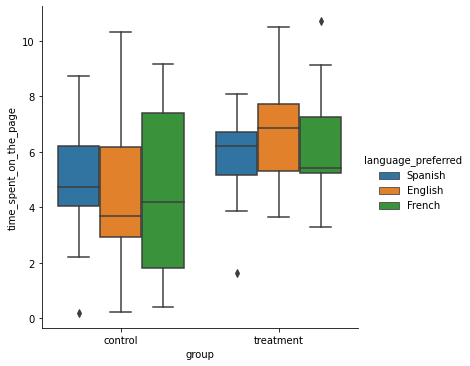

In [310]:
sns.catplot(x="group", y="time_spent_on_the_page", hue="language_preferred", kind="box", data=data)

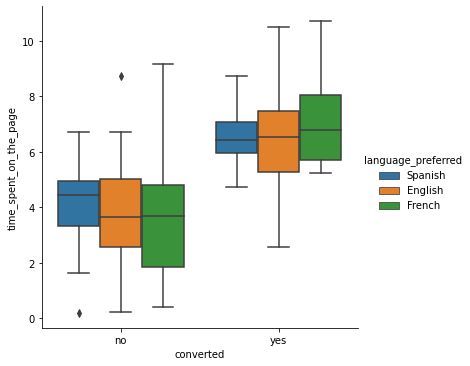

In [311]:
sns.catplot(x="converted", y="time_spent_on_the_page", hue="language_preferred", kind="box", data=data)

To study if average time spent on page depends on language I check the averages are different:

In [313]:
# Check if the trend is similar across Usage/Fitness etc.
data.groupby(by = ['landing_page','language_preferred'])['time_spent_on_the_page'].mean()

landing_page  language_preferred
new           English               6.663750
              French                6.196471
              Spanish               5.835294
old           English               4.454375
              French                4.310000
              Spanish               4.828235
Name: time_spent_on_the_page, dtype: float64

### Conclusions

Based on EDA:
* Distributions for time spent on the page for new and old pages look different. This suggest a trend: customers visitng newpage spent more time 
    on the page
    
* Distributions for times spent on the page when considering preferred language - do not look very diferent. This suggest the time spent on the page does not depend on the preferred language.

* Distribution for time spent on the page for the 2 groups of converted and  not converted to subscription look different. 
* Converted status seems to depend on preferred language. One can see differences in counts for each of the language, but without calculations one cannot make definitive conclusion. 

* Preferred language-Eglish group: Customers who visited new page and converted to subscription spent on average 1 min.longer than those who visited the old page and 2min. longer than those who did not convert to subscription. Spanish and French language groups have different trend.
* In the "control" group (visiting old landing page) we see that distributions for different languages have diferent shapes. Without additional tests it is difficult to say someting based on only visualization. 
* Average time spent on the new page for the 3 customer grups with different preferred language. Conclusion the differences are not significant enough to  say anything about average trends.  
* Average times spent on the web page for those who converted to subscrption for all 3 languages is similar.

# B. Inferential statistics part: questions,calculations,answers

# Q.2: Do the users spend more time on the new landing page than the old landing page?

### Independent two-sample t-test: 

* First formulate the null and alternate hypothesis.

𝐻0
: 𝜇1=𝜇2 (average time spent new landing page = average time spent on old landing page)


𝐻𝑎
: 𝜇1≠𝜇2, There is a difference between times.

* Then we calculate the test-statistic and based on the p-value provide a conclusion.

Store relevant data in 2 dataframes grLPNEW and grLPOLD

In [320]:
grLPNEW.shape,

((50, 6),)

grLPNEW is dataframe that contains data for new landing page 

In [321]:
grLPNEW.describe()

,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546467.50000,6.223200
std,14.57738,1.817031
min,546443.00000,1.650000
25%,546455.25000,5.175000
50%,546467.50000,6.105000
75%,546479.75000,7.160000
max,546492.00000,10.710000


In [322]:
grLPOLD.shape

(50, 6)

grLPOLD is data frame that contains the data for old landing page.

In [323]:
grLPOLD.describe()

,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546566.50000,4.532400
std,17.67767,2.581975
min,546493.00000,0.190000
25%,546555.25000,2.720000
50%,546567.50000,4.380000
75%,546579.75000,6.442500
max,546592.00000,10.300000


In [324]:
print('The mean time spent of the page for old landing page ' + str(round(grLPOLD['time_spent_on_the_page'].mean(),2)))
print('The mean  time spent of the page for new landing page ' + str(grLPNEW['time_spent_on_the_page'].mean()))
print('The standard deviation of time spent of the page for old landing page ' + str(round(grLPOLD['time_spent_on_the_page'].std(), 2)))
print('The standard deviation of time spent of the page for new landing page ' + str(round(grLPNEW['time_spent_on_the_page'].std(), 2)))

The mean time spent of the page for old landing page 4.53
The mean  time spent of the page for new landing page 6.2232
The standard deviation of time spent of the page for old landing page 2.58
The standard deviation of time spent of the page for new landing page 1.82


As we can see we have different average times and different standard deviations.

I use two sample independent t-test (we have 2 samples, continues variable,one-way)

In [325]:
from scipy import stats
x1=grLPOLD['time_spent_on_the_page']
#x1
x2=grLPNEW['time_spent_on_the_page']
t, p_value = stats.ttest_ind(x2, x1,equal_var=False, alternative='greater')
print("tstat = ",t, ", p_value = ", p_value)

tstat =  3.7867702694199856 , p_value =  0.0001392381225166549


The question we have to answer is if differences in averages are due to sampling or are significant. 

* p value is 0.00014 which is smaller than level of significance (0.05) so the null hypothesis can be rejected. 

* Conclusion: 
    The users spend more time on the new landing page.(The observation is valid and not due to sampling error).

* This means that the new  page changed the output significantly.

* If we compare the means of the two sample distributions, we see that they are different numerically,statistically and visually.Inferential statistics results confirm the first impression conclusions from visualization.

    

Below I copy the relevant visualization:

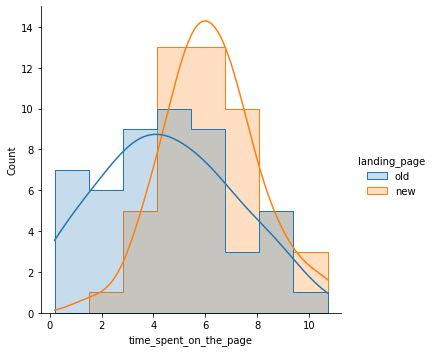

In [187]:
sns.displot(data,x='time_spent_on_the_page',hue='landing_page',kde=True,common_norm=False,element="step")

###  Additional check of the assumptions of the two sample t test

One of the assumptions of the 2 sample t-test is normality of distributions - below I test the 2 samples for it.

I use Shapiro-Wilk test:
Null hypothesis - the distribution is normal.
Alternative hypothesis the dstribution of the data in a sample is not normal. 

In [188]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(grLPNEW['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [189]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(grLPOLD['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.45611920952796936


* Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

* Conclusion the samples follow normal distribution. 

I perform now the Levene’s test for variances:

We will test the null hypothesis - 𝐻0 : the variances are equal

against the alternative hypothesis: 𝐻𝑎 : variances are different from the rest

In [326]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(grLPNEW['time_spent_on_the_page'],grLPOLD['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.008950671168914445


* p is 0.009 which is smaller than confidence level 0.05.

* We can reject null hypothesis that the variances are equal (because of that I used the Welchs testfor t-test function). (Well I know the variances from the data that they are different, as well).

# Q3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

I create a contingency table using the pandas.crosstab() function

In [327]:
pd.crosstab(data['converted'],data['landing_page'])

landing_page,new,old
converted,,
no,17,29
yes,33,21


Conversion rate:

C_new=33/50  
C_old=21/50

### Statistical analysis

First I define null and alternative hypotheses

𝐻0:Conversion rate is the same for both versions of landing page.

𝐻𝑎: Conversion rate is greater for new landing page. C_new > C_old

### Two proportion Z- test

Z-test assumptions:
* Binomally distributed population - yes  (conversion variable can have values 'yes'or 'no')
* Random sampling from the population - yes
*  The standard thing is to check whether np and n(1-p) are greater than or equal to 10. - yes

In [241]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted to subscription
x1 = np.array([33, 21])

# set the sample sizes 
x2 = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(x1, x2,alternative='larger')
print(p_value)

0.008026308204056278


p value = 0.8% < 5% so we can reject null hypothesis that the proportions are the same, and we can conclude that conversion rate on new page is larger.  

### Visualization of the data

For this question I copy below relevant figure: 

<AxesSubplot:xlabel='converted', ylabel='count'>

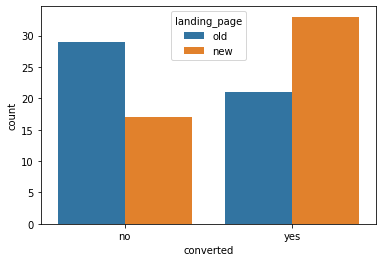

In [328]:
sns.countplot(x='converted',data=data,hue='landing_page')

New page (orange) has higher portion of coverted status than blue - old page.

Conclusion: Statistical analysis and visualization agree.  

# Q4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]


I create a contingency table using the pandas.crosstab() function

In [329]:
pd.crosstab(data['converted'],data['language_preferred'])

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Statistical analysis - I sue the chi2 contingency test

* Null hypothesis = the converted status does not depend on preferred language.

* Alternative  hypothesis = converted status depends on the language.

In [331]:
import pandas as pd
from scipy.stats import chi2_contingency
df = pd.DataFrame({'yes': [21, 15,18], 'no': [11, 19,16]}, index = ['E', 'S','F'])
chi2, pval, dof, exp_freq = chi2_contingency(df)
print(pval)

0.2129888748754345


Conclusion: p value  is larger than confidence level and it means we cannot reject null hypothesis. So we can conclude that converted status does not depend on preferred language.   

### Data visualization:

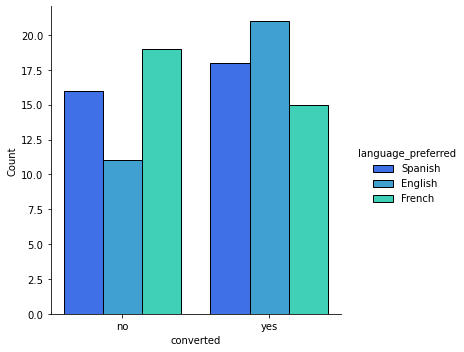

In [332]:
sns.displot(data=data, x="converted", hue="language_preferred", multiple="dodge", shrink=.8,palette="winter")

Conclusions: 

* Visualization:  It is difficult tosee any trend in the data. 
* Based on statistical analysis we can conclude that converted status does not depend on preferred language. 

# Q5. Is the mean time spent on the new page same for the different language users?

### Visualization (copy of relevant figures) 

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

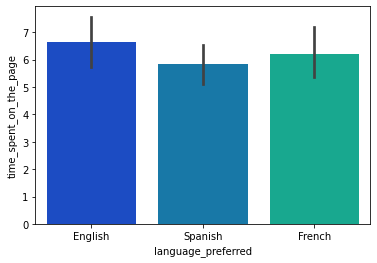

In [333]:

sns.barplot(x='language_preferred', y='time_spent_on_the_page', data=grLPNEW,palette='winter')  # barplot

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

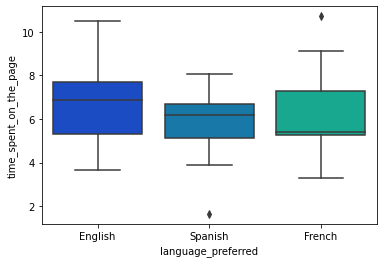

In [334]:
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=grLPNEW,palette='winter')  # barplot

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Count'>

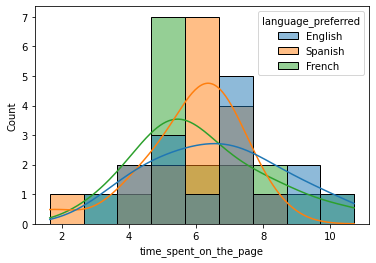

In [335]:
sns.histplot(x='time_spent_on_the_page', data=grLPNEW,kde=True,hue='language_preferred')  # barplot

Boxplot visualitzation might be interpreted that the averages are different (English language preferred group spent the most time on average and French the least). 
But histogram shows that the 3 distributions have slightly different properties. 

### Statistical Analysis - one way ANOVA

First I define null and alternate hypotheses

𝐻0: The time spent on new page with respect to each language category is equal.
𝐻𝑎: At least one of the mean for time spent on new page with respect to the three laguages is different.

I select appropriate test

* This is a problem, concerning three means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, I use Shapiro-Wilk’s test.
* For equality of variance,  I use Levene test below.



### Shapiro-Wilk’s test

We will test the null hypothesis first: 

𝐻0:The time spent on new page follows a normal distribution

against the alternative hypothesis:

𝐻𝑎:The time spent on new page do not not follow a normal distribution

In [336]:
# Assumption 1: Normality- Use the shapiro function for the scipy.stats library for this test
# the p-value
w, p_value = stats.shapiro(grLPNEW['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis.
So the full data follows normal distribution.

One can check the 3 samples distributions:


In [337]:
newpageE = grLPNEW[grLPNEW['language_preferred']=='English']['time_spent_on_the_page']
newpageS = grLPNEW[grLPNEW['language_preferred']=='Spanish']['time_spent_on_the_page']
newpageF = grLPNEW[grLPNEW['language_preferred']=='French']['time_spent_on_the_page']

In [338]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test
# find the p-value

w1, p_value1 = stats.shapiro(newpageE) 
w2, p_value2 = stats.shapiro(newpageS) 
w3, p_value3 = stats.shapiro(newpageF) 
print('The p-valuee are', p_value1, p_value2, p_value3)

The p-valuee are 0.8863451480865479 0.09006839990615845 0.32137173414230347


p value is larger than confidence level which means we cannt reject null hypothesis. The distributions are normal. 

### Levene test

We will test the null hypothesis

    𝐻0 : All the population variances are equal

against the alternative hypothesis

    𝐻𝑎 : At least one variance is different from the rest

In [339]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats 

# find the p-value
statistic, p_value = stats.levene(newpageE,newpageS,newpageF)
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.
So all variances are equal.

### One-way ANOVA

Define null and alternate hypotheses

𝐻0: time spent on the new page doesnto depend on preferred language

𝐻𝑎 : time spent on the new page depends on preferred language

In [340]:
# perform one-way anova test using the f_oneway function from scipy.stats library

test_stat, p_value = stats.f_oneway(newpageE,newpageS,newpageF)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have not enough statistical evidence to say that the mean times spent on the new page  with respect to the preferred laguage are different.